###Identify the ideal number of 🍨 flavors and which flavors should we launch to make sure we reach maximum number of unique people. We want to make sure that for each new flavor added, we see an increase of at least 10% in the number of users. Maximize the frequency in case the reach is same.

##Generating Data for TURF Analysis

We have a data of 100 users, each has submitted their top 2 go-to flavors out of the 10 icecream flavor options that we have.

In [6]:
import random
import pandas as pd

# Define the 10 ice cream flavors
flavors = [
    "Vanilla", "Chocolate", "Strawberry", "Mint", "Cookie Dough",
    "Caramel", "Mango", "Pistachio", "Coffee", "Lemon"
]

# Number of users
num_users = 100

# Generate the dataset
data = {flavor: [] for flavor in flavors}
data["User_ID"] = []

for user_id in range(1, num_users + 1):
    top_flavors = random.sample(flavors, 2)  # Randomly select 2 unique flavors
    data["User_ID"].append(user_id)
    for flavor in flavors:
        data[flavor].append(1 if flavor in top_flavors else 0)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
df.to_csv("ice_cream_preferences_binary.csv", index=False)

# Display the first few rows
df.head()

,Vanilla,Chocolate,Strawberry,Mint,Cookie Dough,Caramel,Mango,Pistachio,Coffee,Lemon,User_ID
0,0,0,0,0,0,0,1,0,1,0,1
1,0,1,0,0,0,0,0,0,1,0,2
2,0,1,0,0,0,0,1,0,0,0,3
3,1,0,0,0,0,0,0,0,1,0,4
4,0,0,1,0,0,0,0,0,0,1,5


## Single flavor reach and frequency

Number of distinct users preferring each flavor:
Vanilla         25
Chocolate       16
Strawberry      26
Mint            20
Cookie Dough    23
Caramel         15
Mango           24
Pistachio       20
Coffee          16
Lemon           15
dtype: int64


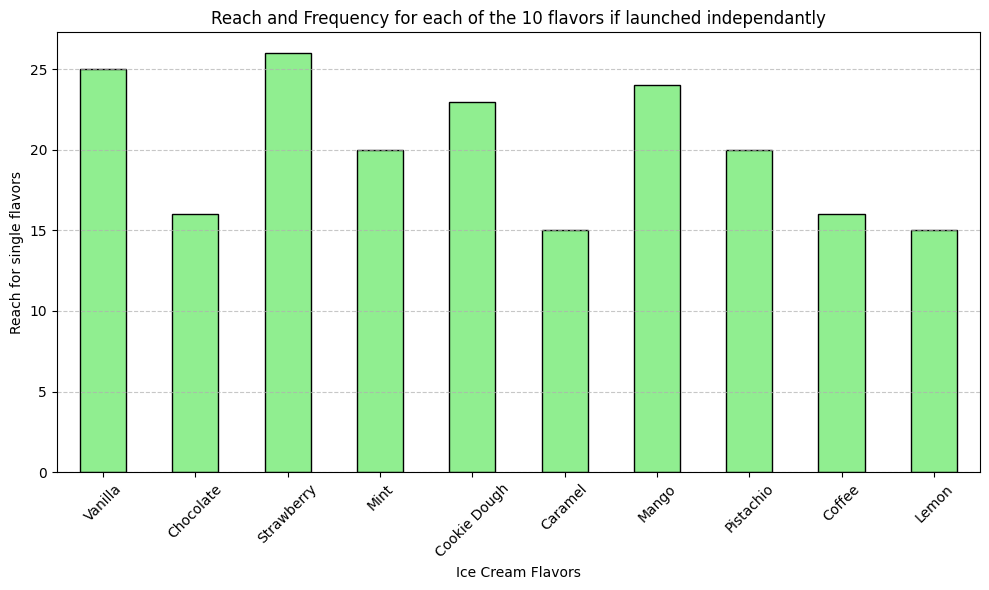

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

flavors = df.columns[:-1]  # Exclude the last column (User_ID)

# Calculate the number of distinct users preferring each flavor
flavor_counts = df[flavors].sum()

# Print the results
print("Number of distinct users preferring each flavor:")
print(flavor_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
flavor_counts.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Reach and Frequency for each of the 10 flavors if launched independantly")
plt.xlabel("Ice Cream Flavors")
plt.ylabel("Reach for single flavors")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
flavor_counts = df[flavors].sum()

# Total number of users
total_users = df["User_ID"].nunique()

# Calculate reach (as percentage of total users)
reach = (flavor_counts / total_users) * 100

# Calculate frequency (as a ratio to total users)
frequency = flavor_counts / total_users

print("Reach for each flavor:")
print(reach)

print("\nFrequency for each flavor:")
print(frequency)

Reach for each flavor:
Vanilla         25.0
Chocolate       16.0
Strawberry      26.0
Mint            20.0
Cookie Dough    23.0
Caramel         15.0
Mango           24.0
Pistachio       20.0
Coffee          16.0
Lemon           15.0
dtype: float64

Frequency for each flavor:
Vanilla         0.25
Chocolate       0.16
Strawberry      0.26
Mint            0.20
Cookie Dough    0.23
Caramel         0.15
Mango           0.24
Pistachio       0.20
Coffee          0.16
Lemon           0.15
dtype: float64


If we have to launch just one flavor then as we can see above, strawberry will help us reach the maximum number of users, ie. **26%** of our total users, hence our go-to flavor to launch should be STRAWBERRY🍓

##Two Flavor Reach and Frequency

In [16]:
import itertools

# Select flavor columns
flavors = df.columns[:-1]  # Exclude the last column (User_ID)

# Generate all possible pairs of two flavors
flavor_pairs = list(itertools.combinations(flavors, 2))

# Calculate reach and frequency for each pair
pair_metrics = []

for flavor1, flavor2 in flavor_pairs:
    # Combine preferences for the pair
    combined_preference = df[flavor1] | df[flavor2]
    combined_sum = df[flavor1] + df[flavor2]

    # Calculate reach and frequency
    reach = (combined_preference.sum() / len(df)) * 100  # Reach as a percentage
    frequency = combined_sum.sum()  # Total sum of preferences

    pair_metrics.append({"Pair": f"{flavor1} & {flavor2}", "Reach (%)": reach, "Frequency": frequency})

# Convert results to DataFrame
pair_metrics_df = pd.DataFrame(pair_metrics)

# Print the results
print(pair_metrics_df)

                         Pair  Reach (%)  Frequency
0         Vanilla & Chocolate       39.0         41
1        Vanilla & Strawberry       48.0         51
2              Vanilla & Mint       41.0         45
3      Vanilla & Cookie Dough       44.0         48
4           Vanilla & Caramel       38.0         40
5             Vanilla & Mango       44.0         49
6         Vanilla & Pistachio       42.0         45
7            Vanilla & Coffee       39.0         41
8             Vanilla & Lemon       40.0         40
9      Chocolate & Strawberry       40.0         42
10           Chocolate & Mint       35.0         36
11   Chocolate & Cookie Dough       37.0         39
12        Chocolate & Caramel       29.0         31
13          Chocolate & Mango       39.0         40
14      Chocolate & Pistachio       35.0         36
15         Chocolate & Coffee       29.0         32
16          Chocolate & Lemon       29.0         31
17          Strawberry & Mint       44.0         46
18  Strawber

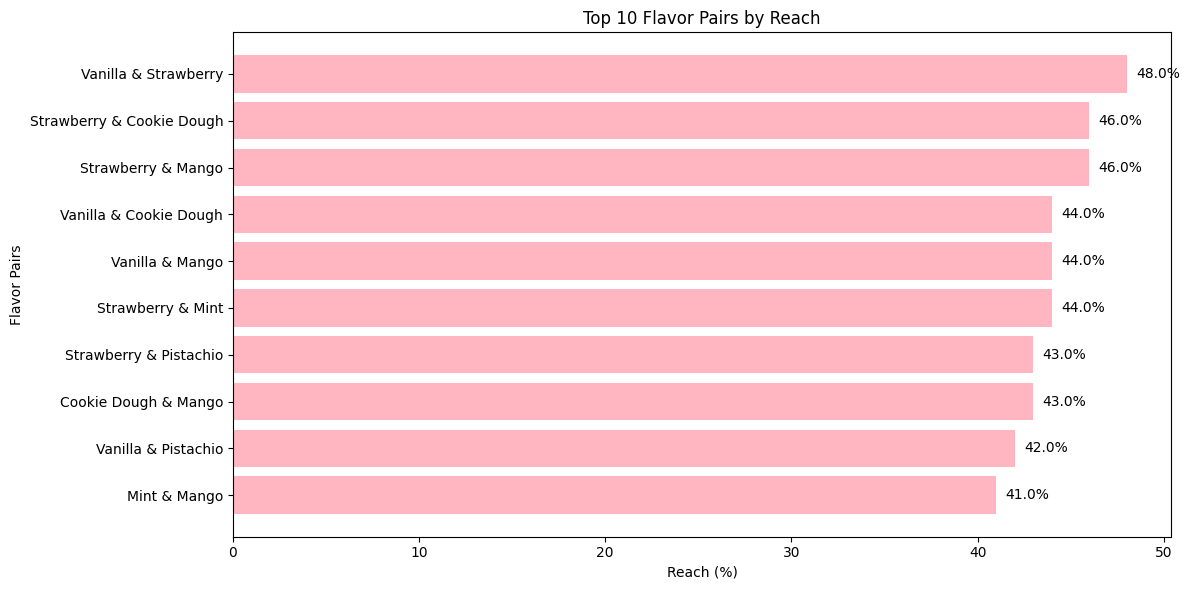

In [21]:
# Calculate the top 10 pairs with the highest reach
top_pairs = pair_metrics_df.sort_values(by="Reach (%)", ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 6))
bars = plt.barh(top_pairs["Pair"], top_pairs["Reach (%)"], color="lightpink")

# Add the % Reach values on the bars
for bar, percent in zip(bars, top_pairs["Reach (%)"]):
    plt.text(
        bar.get_width() + 0.5,  # Position text slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,  # Center text vertically
        f"{percent:.1f}%",  # Format the text as a percentage
        va="center",
        fontsize=10,
    )

# Customize plot appearance
plt.xlabel("Reach (%)")
plt.ylabel("Flavor Pairs")
plt.title("Top 10 Flavor Pairs by Reach")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Display the plot
plt.show()

##Flavour reach and frequency for each of the combinations of 1 to 10 flavors, plotting the top 10 combinations for each.


--- Analyzing Top 10 1-Flavor Combinations ---
    Combination  Reach (%)  Frequency
2    Strawberry       26.0       0.26
0       Vanilla       25.0       0.25
6         Mango       24.0       0.24
4  Cookie Dough       23.0       0.23
3          Mint       20.0       0.20
7     Pistachio       20.0       0.20
1     Chocolate       16.0       0.16
8        Coffee       16.0       0.16
5       Caramel       15.0       0.15
9         Lemon       15.0       0.15


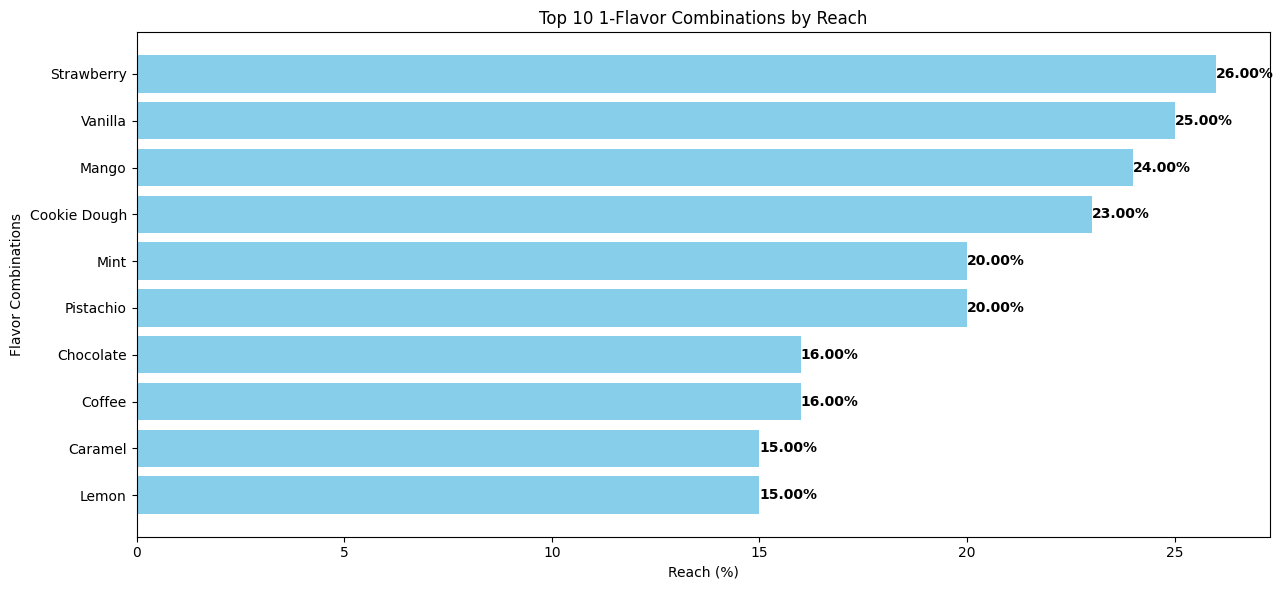


--- Analyzing Top 10 2-Flavor Combinations ---
                  Combination  Reach (%)  Frequency
1        Vanilla + Strawberry       48.0       0.51
20         Strawberry + Mango       46.0       0.50
18  Strawberry + Cookie Dough       46.0       0.49
5             Vanilla + Mango       44.0       0.49
3      Vanilla + Cookie Dough       44.0       0.48
17          Strawberry + Mint       44.0       0.46
31       Cookie Dough + Mango       43.0       0.47
21     Strawberry + Pistachio       43.0       0.46
6         Vanilla + Pistachio       42.0       0.45
2              Vanilla + Mint       41.0       0.45


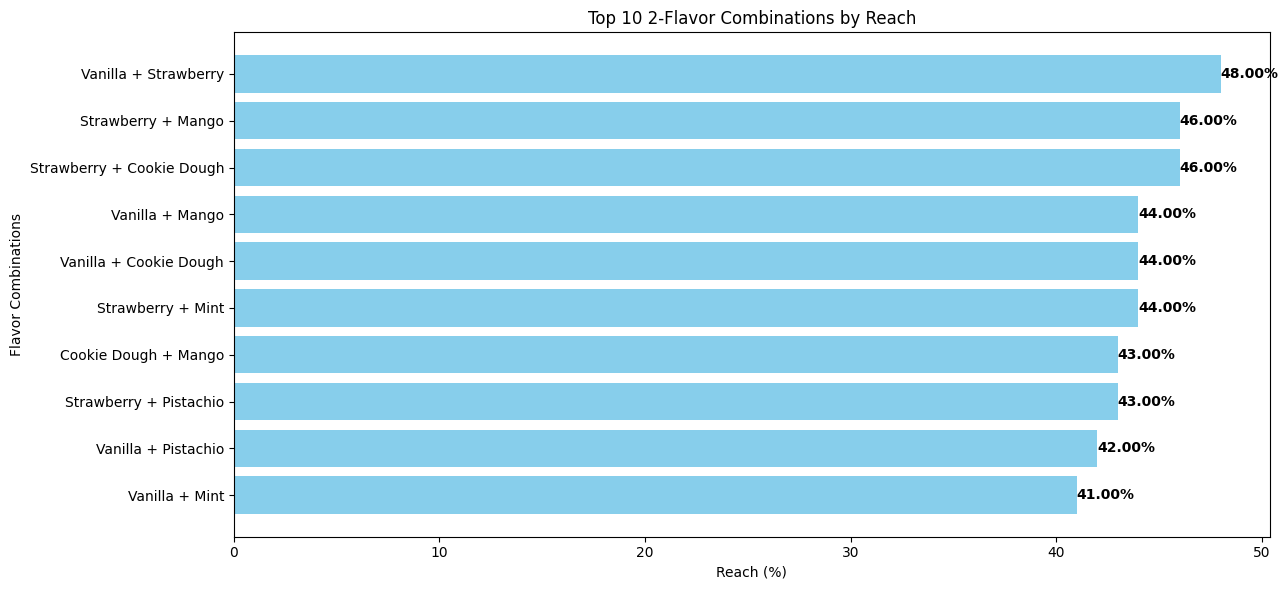


--- Analyzing Top 10 3-Flavor Combinations ---
                              Combination  Reach (%)  Frequency
9     Vanilla + Strawberry + Cookie Dough       64.0       0.74
11           Vanilla + Strawberry + Mango       63.0       0.75
71      Strawberry + Cookie Dough + Mango       62.0       0.73
8             Vanilla + Strawberry + Mint       62.0       0.71
12       Vanilla + Strawberry + Pistachio       62.0       0.71
66              Strawberry + Mint + Mango       61.0       0.70
64       Strawberry + Mint + Cookie Dough       61.0       0.69
72  Strawberry + Cookie Dough + Pistachio       61.0       0.69
13          Vanilla + Strawberry + Coffee       61.0       0.67
67          Strawberry + Mint + Pistachio       61.0       0.66


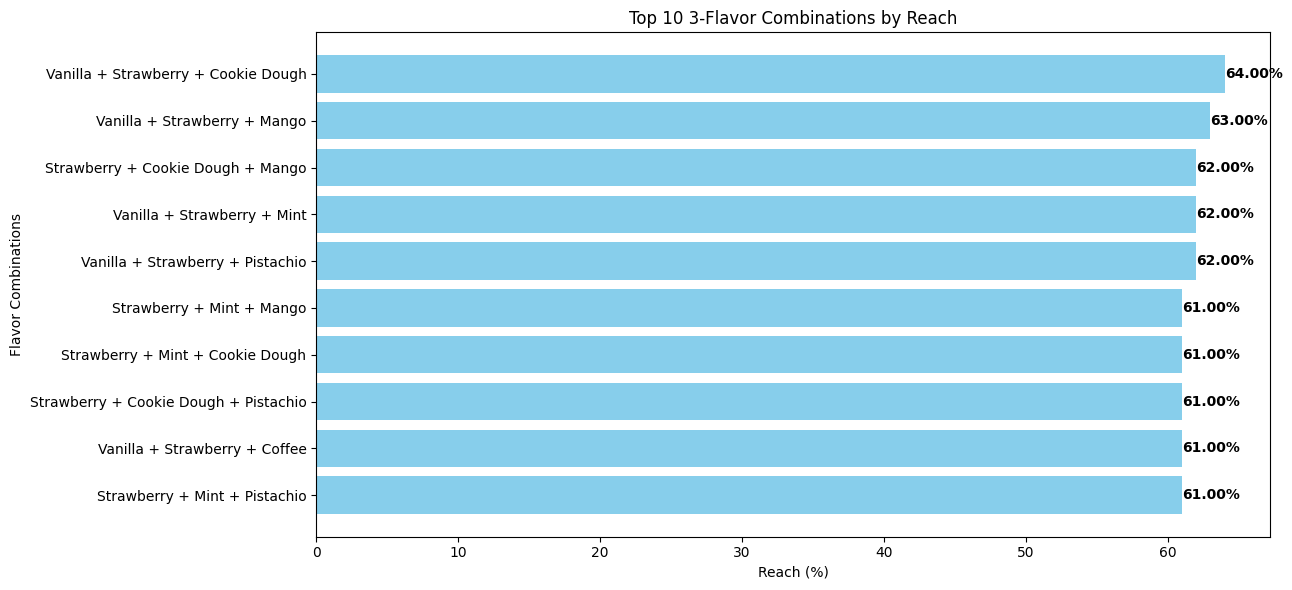


--- Analyzing Top 10 4-Flavor Combinations ---
                                         Combination  Reach (%)  Frequency
36   Vanilla + Strawberry + Cookie Dough + Pistachio       76.0       0.94
31           Vanilla + Strawberry + Mint + Pistachio       76.0       0.91
142     Strawberry + Mint + Cookie Dough + Pistachio       76.0       0.89
35       Vanilla + Strawberry + Cookie Dough + Mango       75.0       0.98
28        Vanilla + Strawberry + Mint + Cookie Dough       75.0       0.94
44             Vanilla + Strawberry + Mango + Coffee       75.0       0.91
37      Vanilla + Strawberry + Cookie Dough + Coffee       75.0       0.90
30               Vanilla + Strawberry + Mint + Mango       74.0       0.95
141         Strawberry + Mint + Cookie Dough + Mango       74.0       0.93
3           Vanilla + Chocolate + Strawberry + Mango       74.0       0.91


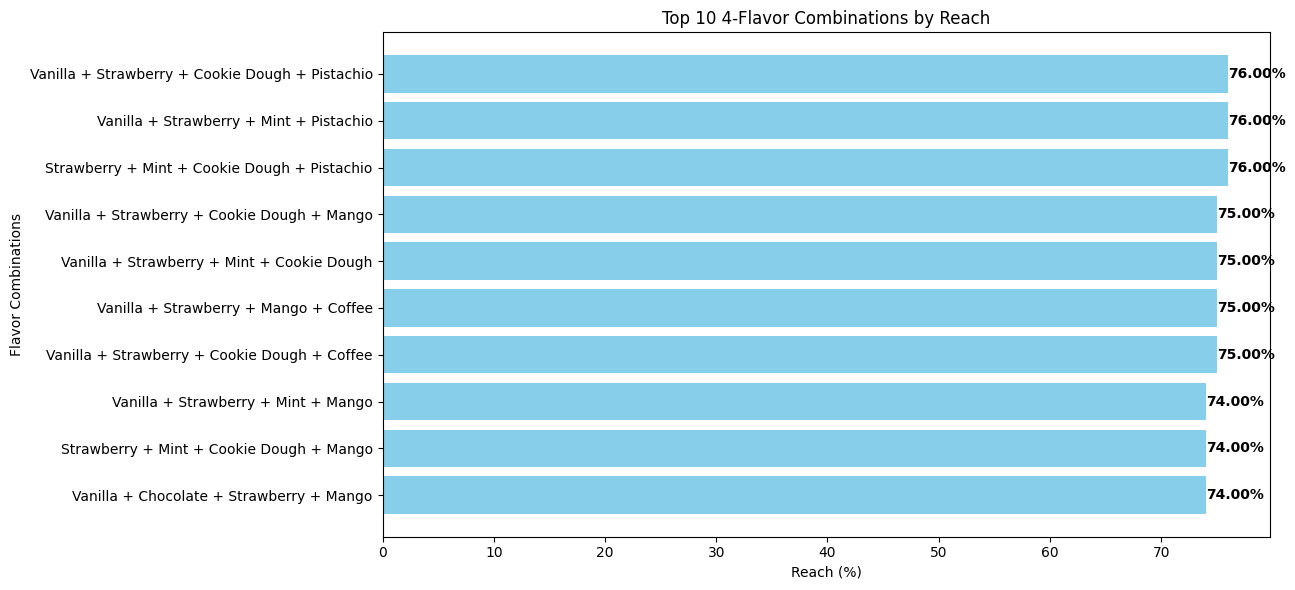


--- Analyzing Top 10 5-Flavor Combinations ---
                                           Combination  Reach (%)  Frequency
58   Vanilla + Strawberry + Mint + Cookie Dough + P...       87.0       1.14
3    Vanilla + Chocolate + Strawberry + Mint + Pist...       86.0       1.07
128  Chocolate + Strawberry + Mint + Cookie Dough +...       86.0       1.05
76   Vanilla + Strawberry + Cookie Dough + Mango + ...       85.0       1.14
200  Strawberry + Mint + Cookie Dough + Mango + Pis...       85.0       1.13
8    Vanilla + Chocolate + Strawberry + Cookie Doug...       85.0       1.10
78   Vanilla + Strawberry + Cookie Dough + Pistachi...       85.0       1.10
135  Chocolate + Strawberry + Mint + Mango + Pistachio       85.0       1.06
65     Vanilla + Strawberry + Mint + Mango + Pistachio       84.0       1.15
7    Vanilla + Chocolate + Strawberry + Cookie Doug...       84.0       1.14


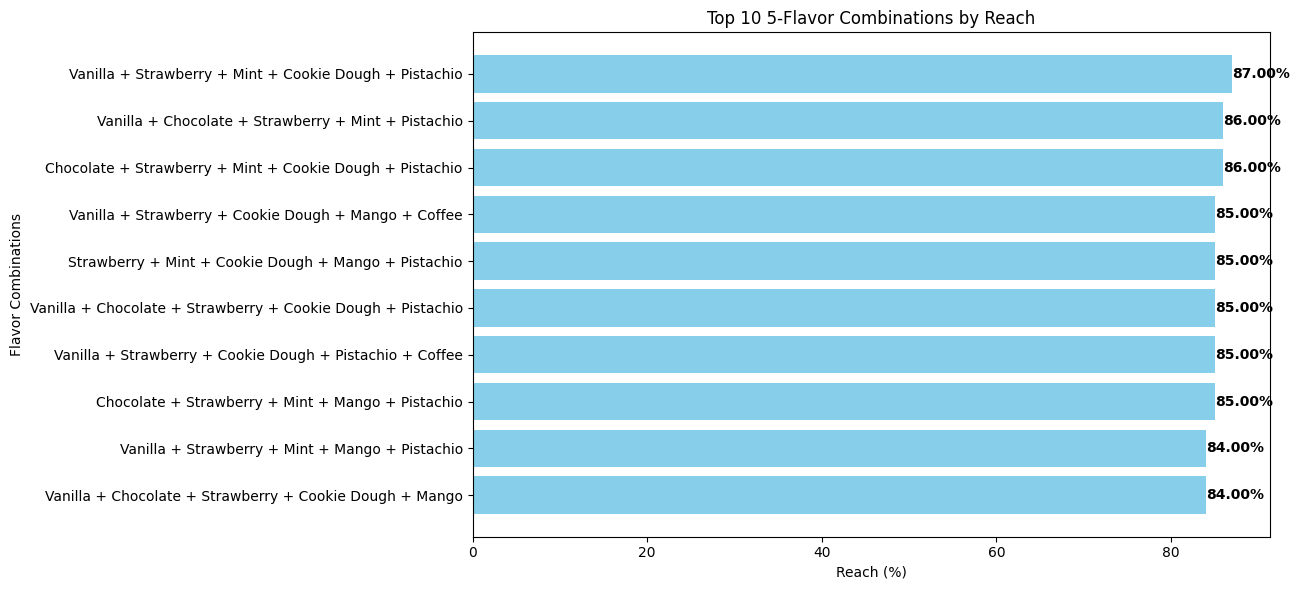


--- Analyzing Top 10 6-Flavor Combinations ---
                                           Combination  Reach (%)  Frequency
2    Vanilla + Chocolate + Strawberry + Mint + Cook...       95.0       1.30
130  Chocolate + Strawberry + Mint + Cookie Dough +...       94.0       1.29
9    Vanilla + Chocolate + Strawberry + Mint + Mang...       93.0       1.31
77   Vanilla + Strawberry + Mint + Cookie Dough + P...       93.0       1.30
98   Vanilla + Strawberry + Cookie Dough + Mango + ...       93.0       1.29
71   Vanilla + Strawberry + Mint + Cookie Dough + C...       92.0       1.29
188  Strawberry + Mint + Cookie Dough + Mango + Pis...       92.0       1.29
93   Vanilla + Strawberry + Cookie Dough + Caramel ...       92.0       1.25
74   Vanilla + Strawberry + Mint + Cookie Dough + M...       91.0       1.38
1    Vanilla + Chocolate + Strawberry + Mint + Cook...       91.0       1.34


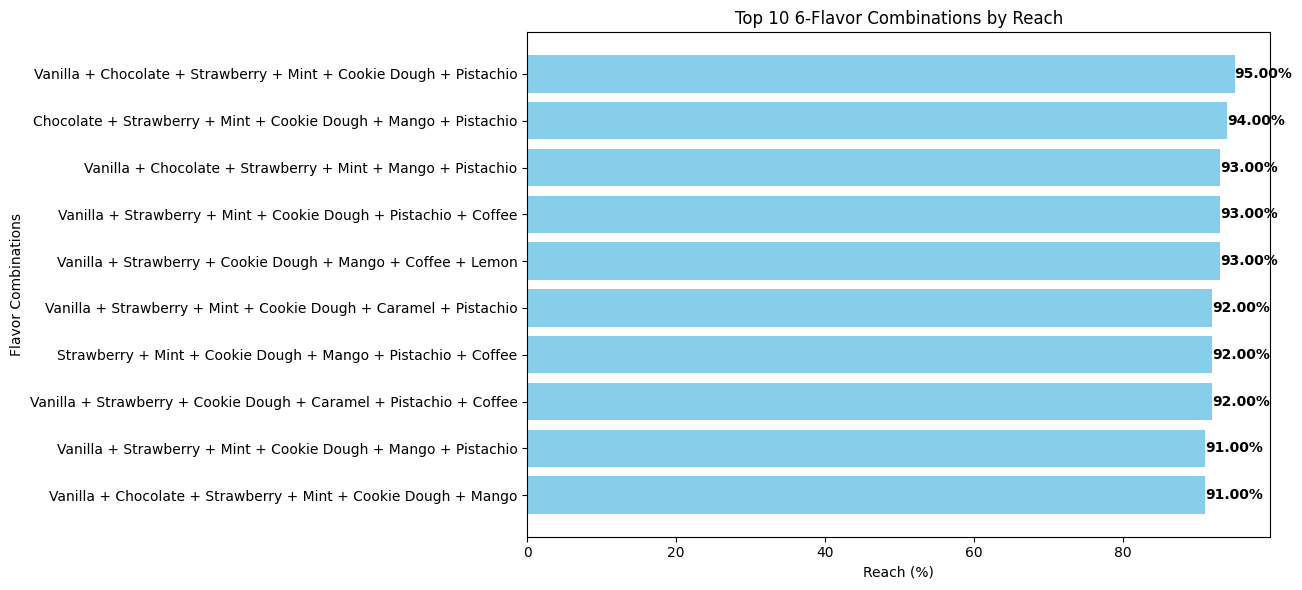


--- Analyzing Top 10 7-Flavor Combinations ---
                                          Combination  Reach (%)  Frequency
4   Vanilla + Chocolate + Strawberry + Mint + Cook...       98.0       1.54
7   Vanilla + Chocolate + Strawberry + Mint + Cook...       98.0       1.46
1   Vanilla + Chocolate + Strawberry + Mint + Cook...       98.0       1.45
90  Chocolate + Strawberry + Mint + Cookie Dough +...       98.0       1.45
73  Vanilla + Strawberry + Cookie Dough + Caramel ...       98.0       1.44
6   Vanilla + Chocolate + Strawberry + Mint + Cook...       97.0       1.49
64  Vanilla + Strawberry + Mint + Cookie Dough + M...       97.0       1.49
16  Vanilla + Chocolate + Strawberry + Mint + Mang...       97.0       1.47
28  Vanilla + Chocolate + Strawberry + Cookie Doug...       97.0       1.45
59  Vanilla + Strawberry + Mint + Cookie Dough + C...       97.0       1.45


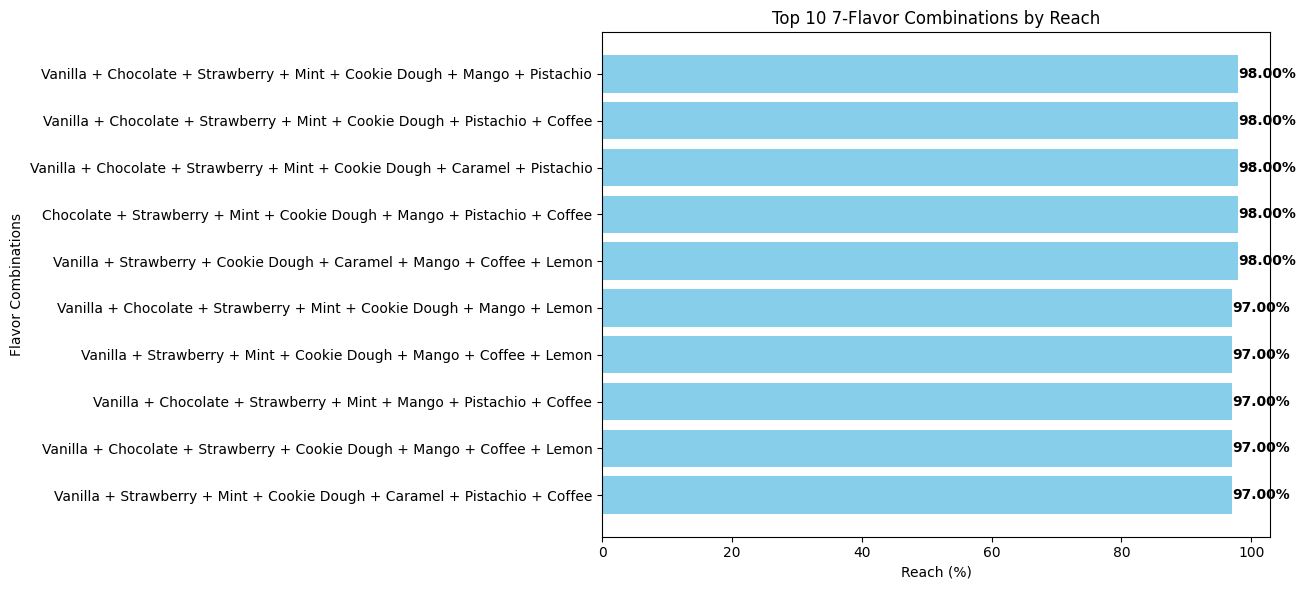


--- Analyzing Top 10 8-Flavor Combinations ---
                                          Combination  Reach (%)  Frequency
6   Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.70
8   Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.65
3   Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.61
17  Vanilla + Chocolate + Strawberry + Cookie Doug...      100.0       1.60
36  Chocolate + Strawberry + Mint + Cookie Dough +...      100.0       1.60
0   Vanilla + Chocolate + Strawberry + Mint + Cook...       99.0       1.69
7   Vanilla + Chocolate + Strawberry + Mint + Cook...       99.0       1.69
15  Vanilla + Chocolate + Strawberry + Cookie Doug...       99.0       1.65
30  Vanilla + Strawberry + Mint + Cookie Dough + C...       99.0       1.64
34  Vanilla + Strawberry + Cookie Dough + Caramel ...       99.0       1.64


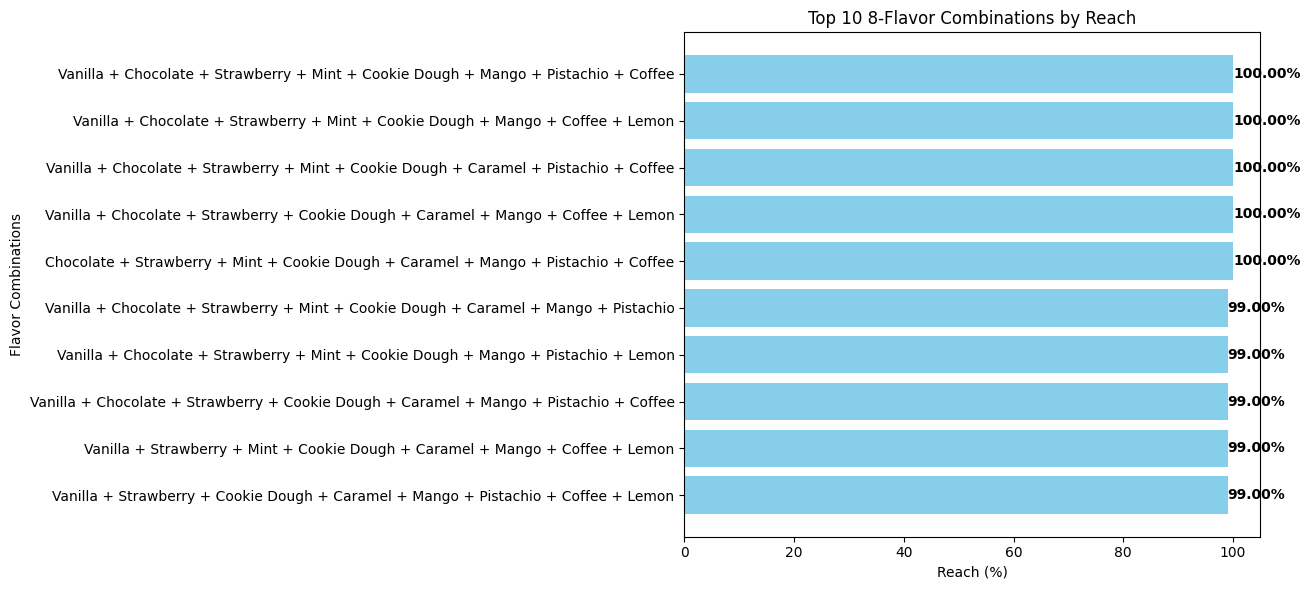


--- Analyzing Top 10 9-Flavor Combinations ---
                                         Combination  Reach (%)  Frequency
0  Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.85
4  Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.85
1  Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.84
8  Vanilla + Strawberry + Mint + Cookie Dough + C...      100.0       1.84
2  Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.80
6  Vanilla + Chocolate + Strawberry + Cookie Doug...      100.0       1.80
5  Vanilla + Chocolate + Strawberry + Mint + Cara...      100.0       1.77
3  Vanilla + Chocolate + Strawberry + Mint + Cook...      100.0       1.76
9  Chocolate + Strawberry + Mint + Cookie Dough +...      100.0       1.75
7  Vanilla + Chocolate + Mint + Cookie Dough + Ca...      100.0       1.74


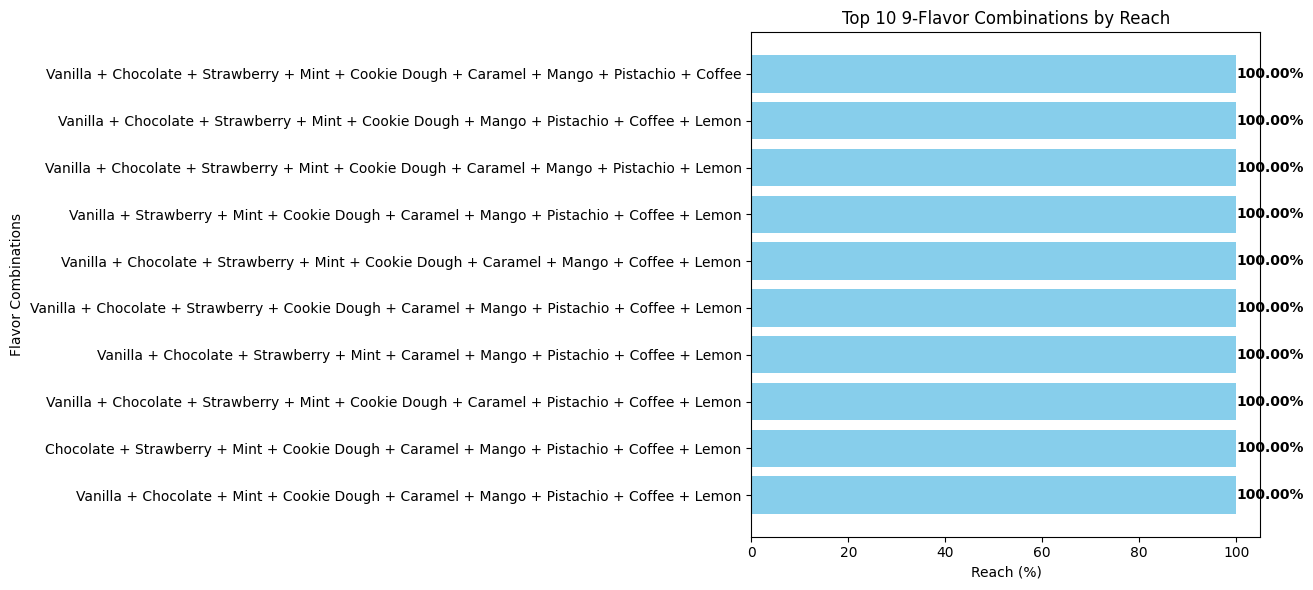

In [38]:
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

def analyze_flavor_combinations(df, flavors, n):
    # Loop through sizes of combinations from 1 to n
    for combo_size in range(1, n + 1):
        print(f"\n--- Analyzing Top 10 {combo_size}-Flavor Combinations ---")

        # Generate all combinations of the current size
        flavor_combinations = list(combinations(flavors, combo_size))

        # List to store the metrics
        combination_metrics = []

        # Analyze each combination
        for combination in flavor_combinations:
            # Subset the dataframe for the combination
            subset = df[list(combination)]

            # Calculate reach and frequency
            reach = (subset.sum(axis=1) > 0).sum()  # Count unique users who like at least one flavor in the combination
            frequency = subset.sum().sum()/100  # Count total instances of users liking the flavors

            # Append the metrics
            combination_metrics.append({
                "Combination": " + ".join(combination),
                "Reach (%)": (reach / len(df)) * 100,
                "Frequency": frequency
            })

        # Create a DataFrame to store the results
        combination_metrics_df = pd.DataFrame(combination_metrics)

        # Sort by Reach (%) and Frequency, with Reach having priority
        combination_metrics_df = combination_metrics_df.sort_values(by=["Reach (%)", "Frequency"], ascending=[False, False])

        # Get top 10 combinations based on reach
        top_10_combinations = combination_metrics_df.head(10)

        # Print the top 10 combinations
        print(top_10_combinations[['Combination', 'Reach (%)', 'Frequency']])

        # Plotting the top 10 combinations based on reach
        plt.figure(figsize=(13, 6))
        plt.barh(top_10_combinations['Combination'], top_10_combinations['Reach (%)'], color='skyblue')
        plt.xlabel('Reach (%)')
        plt.ylabel('Flavor Combinations')
        plt.title(f'Top 10 {combo_size}-Flavor Combinations by Reach')
        plt.gca().invert_yaxis()  # To have the top combination at the top of the plot
        for index, value in enumerate(top_10_combinations['Reach (%)']):
            plt.text(value, index, f'{value:.2f}%', va='center', ha='left', color='black', fontweight='bold')
        plt.tight_layout()
        plt.show()

# Example usage for combinations from 1 to 3 flavors
analyze_flavor_combinations(df, flavors, 9)


##Ideal number of flavors to launch --> at least a 10% increase in reach for each new flavor

In [43]:
import pandas as pd
from itertools import combinations

def create_highest_reach_df(df, flavors, n):
    # List to store the results
    results = []

    # Loop through sizes of combinations from 1 to n
    for combo_size in range(1, n + 1):
        # Generate all combinations of the current size
        flavor_combinations = list(combinations(flavors, combo_size))

        # List to store the metrics for the current size
        combination_metrics = []

        # Analyze each combination
        for combination in flavor_combinations:
            # Subset the dataframe for the combination
            subset = df[list(combination)]

            # Calculate reach and frequency
            reach = (subset.sum(axis=1) > 0).sum()  # Count unique users who like at least one flavor in the combination
            frequency = subset.sum().sum()  # Count total instances of users liking the flavors

            # Append the metrics
            combination_metrics.append({
                "Number of Flavors": combo_size,
                "List of Flavors": combination,
                "Reach (%)": (reach / len(df)) * 100,
                "Frequency": frequency
            })

        # Create a DataFrame to store the results for the current size
        combination_metrics_df = pd.DataFrame(combination_metrics)

        # Sort by Reach (%) and Frequency, with Reach having priority
        combination_metrics_df = combination_metrics_df.sort_values(by=["Reach (%)", "Frequency"], ascending=[False, False])

        # Select the top combination for the current size
        top_combination = combination_metrics_df.iloc[0]
        results.append(top_combination)

    # Convert results into a DataFrame
    highest_reach_df = pd.DataFrame(results)

    # Format the List of Flavors column as strings
    highest_reach_df["List of Flavors"] = highest_reach_df["List of Flavors"].apply(lambda x: ", ".join(x))

    return highest_reach_df

# Example usage for combinations from 1 to 3 flavors
highest_reach_df = create_highest_reach_df(df, flavors, 10)

# Print the resulting DataFrame
highest_reach_df


,Number of Flavors,List of Flavors,Reach (%),Frequency
2,1,Strawberry,26.0,26
1,2,"Vanilla, Strawberry",48.0,51
9,3,"Vanilla, Strawberry, Cookie Dough",64.0,74
36,4,"Vanilla, Strawberry, Cookie Dough, Pistachio",76.0,94
58,5,"Vanilla, Strawberry, Mint, Cookie Dough, Pista...",87.0,114
2,6,"Vanilla, Chocolate, Strawberry, Mint, Cookie D...",95.0,130
4,7,"Vanilla, Chocolate, Strawberry, Mint, Cookie D...",98.0,154
6,8,"Vanilla, Chocolate, Strawberry, Mint, Cookie D...",100.0,170
0,9,"Vanilla, Chocolate, Strawberry, Mint, Cookie D...",100.0,185
0,10,"Vanilla, Chocolate, Strawberry, Mint, Cookie D...",100.0,200


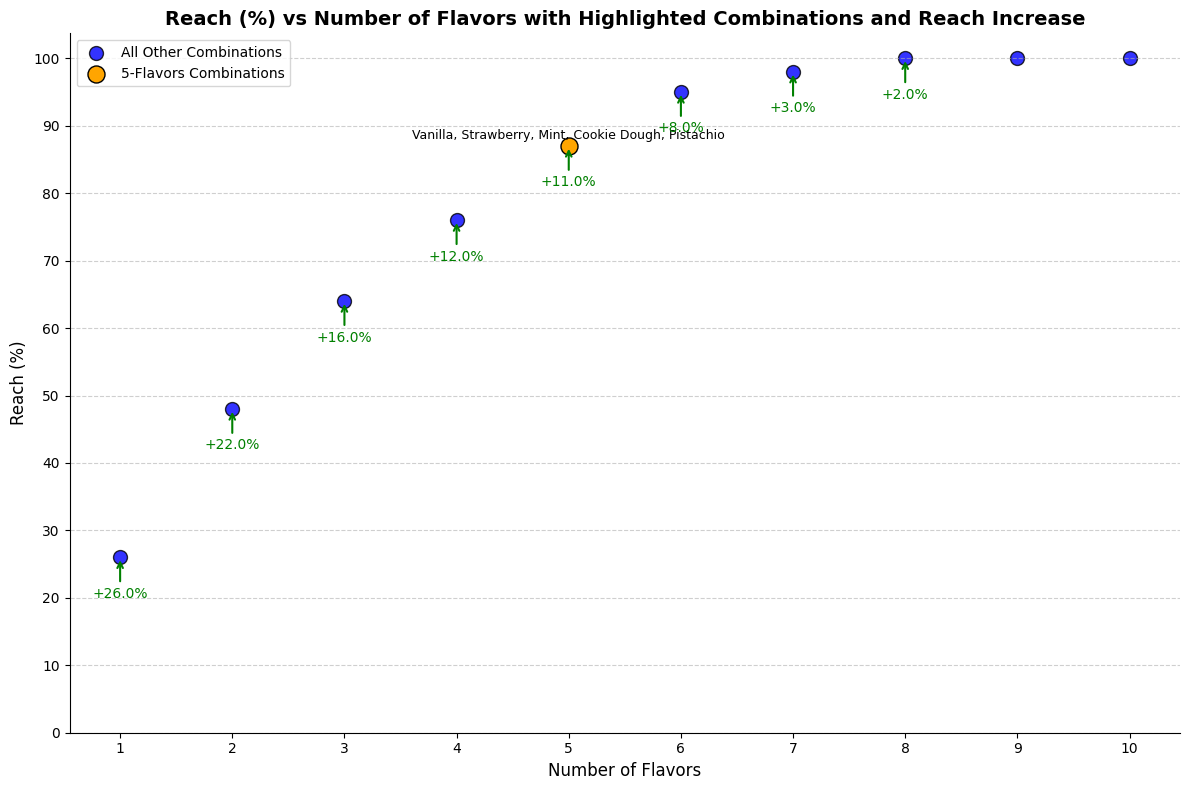

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for combinations with exactly 5 flavors
highlight_data = highest_reach_df[highest_reach_df["Number of Flavors"] == 5]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot all points in blue
plt.scatter(
    highest_reach_df["Number of Flavors"],
    highest_reach_df["Reach (%)"],
    s=100,
    c="blue",
    edgecolor="k",
    alpha=0.8,
    label="All Other Combinations",
)

# Highlight combinations with 5 flavors in orange
plt.scatter(
    highlight_data["Number of Flavors"],
    highlight_data["Reach (%)"],
    s=150,
    c="orange",
    edgecolor="k",
    label="5-Flavors Combinations",
)

# Add annotations for 5-flavor combinations
for i, row in highlight_data.iterrows():
    plt.text(
        row["Number of Flavors"],
        row["Reach (%)"] + 1,  # Offset slightly above the point
        f"{row['List of Flavors']}",
        fontsize=9,
        ha="center",
        color="black",  # Write in black
    )

# Highlight the increase in reach for each increase in n, with arrows just below the points
previous_reach = 0
for n in range(1, highest_reach_df["Number of Flavors"].max() + 1):
    current_reach = highest_reach_df[highest_reach_df["Number of Flavors"] == n]["Reach (%)"].max()
    if not pd.isna(current_reach) and current_reach > previous_reach:
        plt.annotate(
            f"+{current_reach - previous_reach:.1f}%",
            xy=(n, current_reach),  # Point to the current point
            xytext=(n, current_reach - 6),  # Slightly below the current point
            fontsize=10,
            arrowprops=dict(arrowstyle="->", color="green", lw=1.5),
            color="green",
            ha="center",
        )
        previous_reach = current_reach

# Customize axes
plt.gca().spines[["top", "right"]].set_visible(False)
plt.xticks(range(1, highest_reach_df["Number of Flavors"].max() + 1))
plt.yticks(range(0, int(highest_reach_df["Reach (%)"].max()) + 10, 10))
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Add titles and labels
plt.title("Reach (%) vs Number of Flavors with Highlighted Combinations and Reach Increase", fontsize=14, weight="bold")
plt.xlabel("Number of Flavors", fontsize=12)
plt.ylabel("Reach (%)", fontsize=12)

# Add legend
plt.legend(loc="upper left", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


#Ideal number of flavors to Launch is: 5


#Top flavors are Vanilla🥀 , Strawberry🍓, Mint🍃, Cookie Dough🍪, Pistachio🌰